## Computer Vision(CS 436, CS5310, EE513) Programming Assignment#2

###  In this part of assignment you'll be determining the intrinsic and extrinsic parameters of a your mobile phone camera using camera calibration techniques. 
### Undergrad students have to strictly follow the handout and implement the procedure outlined in the handout. Grad students can follow the handout and get full marks but they are free to experiment and they can look at other ways of finding the projection matrix but keep in mind that you are not allowed to copy code or pictures, the picture you use for calibration should be your own and should be taken from you own mobile phone camera. You should be able to explain every step of your implementation.
### For this assignment we are using the direct linear transformation method

In [0]:
#Imports
import matplotlib
import cv2
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap
%matplotlib inline

## Part 1 (30 marks for undergrad)
### Take image of a calibration object with your camera phone. Unlike shown in the lecture slides here you are required to choose an appropriate 3D calibration object (i.e. a nonplanar object, a rubiks cube for example) so that the world points on that object span a 3-dimensional space, and the image points are easy to mark. Place the calibration object on a horizontal plane, such as a tabletop, or floor, to take the image. Mark at least 20 image points as carefully as possible and establish their world coordinates in millimeters. 
### From this data, compute the camera matrix P. Show the original points and the back-projected camera points on a single image and compute the average re-projection error.

Reading the file "object.jpg".

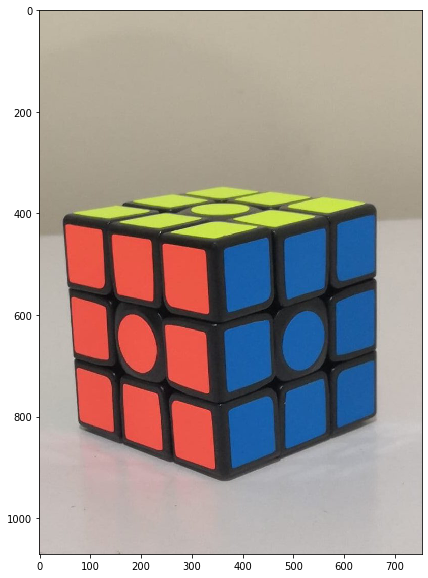

In [2]:
plt.figure(figsize=(10,10))
Calibration_object = np.array(mpimg.imread('object.jpg'))
Calibration_object.setflags(write = 1)
plt.imshow(Calibration_object)

Marking 21 image points (with red).

In [0]:
coordinates = np.array(
    [
     [660, 790, 1, 1],
     [70, 680, 1, 1],
     [145, 700, 1, 1],
     [250, 730, 1, 1],
     [350, 765, 1, 1],
     [80, 810, 1, 1],
     [150, 840, 1, 1],
     [250, 880, 1, 1],
     [360, 915, 1, 1],
     [475, 870, 1, 1],
     [580, 830, 1, 1],
     [235, 585, 1, 1],
     [345, 600, 1, 1],
     [460, 580, 1, 1],
     [570, 550, 1, 1],
     [655, 520, 1, 1],
     [460, 730, 1, 1],
     [570, 700, 1, 1],
     [655, 665, 1, 1],
     [60, 540, 1, 1],
     [135, 555, 1, 1]
    ]
)

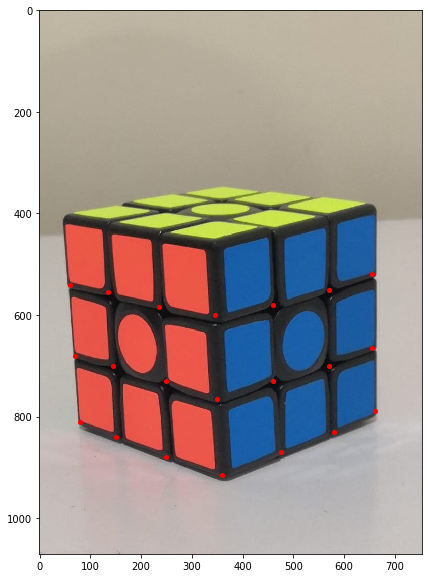

In [4]:
plt.figure(figsize=(10,10))
for x in range(21):
  plt.plot(coordinates[x][0], coordinates[x][1], 'ro', markersize=4)
plt.imshow(Calibration_object)
plt.show()

Establishing world coordinates in millimeters:

In [0]:
WorldCoordinates = np.array(
    [
     [3,0,3],
     [0,1,0],
     [1,1,0],
     [2,1,0],
     [3,1,0],
     [0,0,0],
     [1,0,0],
     [2,0,0],
     [3,0,0],
     [3,0,1],
     [3,0,2],
     [2,2,0],
     [3,2,0],
     [3,2,1],
     [3,2,2],
     [3,2,3],
     [3,1,1],
     [3,1,2],
     [3,1,3],
     [0,2,0],
     [1,2,0]
    ]
)

In [0]:
# these are in milimeters
Height = 57
SmallBoxHeight = 19

In [0]:
# scaling the world corrdindates
ScaledWorldCoordinates = SmallBoxHeight * WorldCoordinates

In [8]:
# converting ScaledWorldCoordinates to homogeneous ScaledWorldCoordinates
HomogeneousScaledWorldCoordinates = np.ones((21, 1))
HomogeneousScaledWorldCoordinates = np.append(ScaledWorldCoordinates, HomogeneousScaledWorldCoordinates, axis=1)
HomogeneousScaledWorldCoordinates

array([[57.,  0., 57.,  1.],
       [ 0., 19.,  0.,  1.],
       [19., 19.,  0.,  1.],
       [38., 19.,  0.,  1.],
       [57., 19.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [19.,  0.,  0.,  1.],
       [38.,  0.,  0.,  1.],
       [57.,  0.,  0.,  1.],
       [57.,  0., 19.,  1.],
       [57.,  0., 38.,  1.],
       [38., 38.,  0.,  1.],
       [57., 38.,  0.,  1.],
       [57., 38., 19.,  1.],
       [57., 38., 38.,  1.],
       [57., 38., 57.,  1.],
       [57., 19., 19.,  1.],
       [57., 19., 38.,  1.],
       [57., 19., 57.,  1.],
       [ 0., 38.,  0.,  1.],
       [19., 38.,  0.,  1.]])

Computing the camera matrix P:

In [0]:
# combining matrix C
NumberOfPoints = 21
C = []

for i in range (NumberOfPoints):
  WorldCoordinateX = HomogeneousScaledWorldCoordinates[i][0]
  WorldCoordinateY = HomogeneousScaledWorldCoordinates[i][1]
  WorldCoordinateZ = HomogeneousScaledWorldCoordinates[i][2]

  coordinatesX = coordinates[i][0]
  coordinatesY = coordinates[i][1]
  coordinatesZ = coordinates[i][2]

  xX = coordinatesX*WorldCoordinateX
  xY = coordinatesX*WorldCoordinateY
  xZ = coordinatesX*WorldCoordinateZ

  row1 = [WorldCoordinateX, WorldCoordinateY, WorldCoordinateZ, 1, 0, 0, 0, 0, -xX, -xY, -xZ, -coordinatesX]
  C.append(row1)

  yX = coordinatesY*WorldCoordinateX
  yY = coordinatesY*WorldCoordinateY
  yZ = coordinatesY*WorldCoordinateZ

  row2 = [0, 0, 0, 0, WorldCoordinateX, WorldCoordinateY, WorldCoordinateZ, 1, -yX, -yY, -yZ, -coordinatesY]
  C.append(row2)

C = np.array(C)

In [0]:
# Calculating the null space of C
NullSpaceOfC = np.linalg.svd(C)

In [0]:
# Extracting V transpose 
VTranspose = NullSpaceOfC[2]

In [12]:
# Extracting the last column of V transpose
SingularValueOfZeroColumn = VTranspose[-1]
SingularValueOfZeroColumn

array([ 4.72080312e-03, -7.38975900e-04,  7.80212913e-03,  9.52019534e-02,
       -1.04532943e-03, -9.08505147e-03,  6.22932387e-04,  9.95372967e-01,
       -3.81176376e-06, -9.50826635e-07,  3.65675498e-06,  1.23327579e-03])

In [13]:
# Reshaping SingularValueOfZeroColumn into a 3x4 matrix
P = SingularValueOfZeroColumn.reshape(3,4)
P

array([[ 4.72080312e-03, -7.38975900e-04,  7.80212913e-03,
         9.52019534e-02],
       [-1.04532943e-03, -9.08505147e-03,  6.22932387e-04,
         9.95372967e-01],
       [-3.81176376e-06, -9.50826635e-07,  3.65675498e-06,
         1.23327579e-03]])

Computing the average re-projection error

In [14]:
coordinatesTranspose = coordinates.transpose()
HomogeneousScaledWorldCoordinatesTranspose = HomogeneousScaledWorldCoordinates.transpose()
BackProjectedCameraPoints = P.dot(HomogeneousScaledWorldCoordinatesTranspose)

for i in range(NumberOfPoints):
  BackProjectedCameraPoints[0][i] /= BackProjectedCameraPoints[2][i]
  BackProjectedCameraPoints[1][i] /= BackProjectedCameraPoints[2][i]
  BackProjectedCameraPoints[2][i] = 1

errorX = BackProjectedCameraPoints[0] - coordinatesTranspose[0]
errorY = BackProjectedCameraPoints[1] - coordinatesTranspose[1]
Square = np.square(errorX + errorY)
Sum = np.sum(Square)
sqrt = np.sqrt(Sum)
ReProjectionError = sqrt/25
ReProjectionError

1.0426782907310255

Showing the original points and the back-projected camera points on a single image.

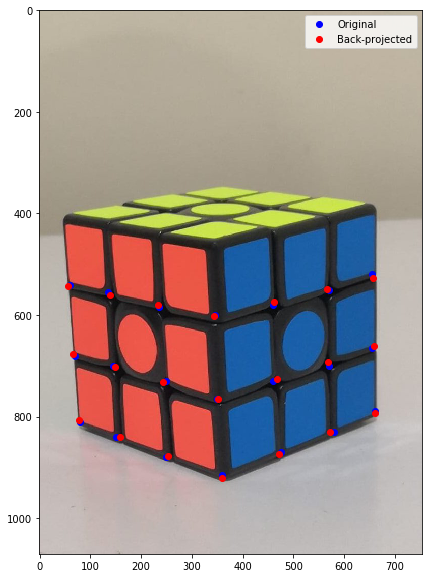

In [15]:
plt.figure(figsize=(10,10))
plt.plot(coordinatesTranspose[0], coordinatesTranspose[1], 'bo', label='Original', markersize=6)
plt.plot(BackProjectedCameraPoints[0], BackProjectedCameraPoints[1], 'ro', label='Back-projected', markersize=6)
plt.legend()
plt.imshow(Calibration_object)
plt.show()

## Part 2 (10 marks)
### Since we are using direct linear transformation, you are required to implement QR decomposition of a matrix

In [0]:
# This function takes a matrix and returns its QR decomposition 
def QR_Decomposition(M): 
  decomposition = np.linalg.qr(M)
  return decomposition

## Part 3 (30 marks)
### Compute camera center C, intrinsic matrix K and Rotation matrix R. Generate a 3D figure which shows the calibration points, the camera center and the orientation of the camera in 3D (You also have to plot the points for 3d calibration object as well)

Computing the camera center C:

In [0]:
# Calculating the null space of P
NullSpaceOfP = np.linalg.svd(P)

In [0]:
# Extracting V transpose 
VTranspose = NullSpaceOfP[2]

In [19]:
# Extracting the last column of V transpose
SingularValueOfZeroColumn = VTranspose[-1]
SingularValueOfZeroColumn

array([-0.79724022, -0.33521608,  0.50201641, -0.00421104])

In [20]:
# Reshaping SingularValueOfZeroColumn into a 4x1 matrix
C = SingularValueOfZeroColumn.reshape(4,1)
C

array([[-0.79724022],
       [-0.33521608],
       [ 0.50201641],
       [-0.00421104]])

In [21]:
# We need to format [[x],[y],[z],[1]] so we manipulate
factor = C[3]
C = C/factor
C

array([[ 189.32141598],
       [  79.60408986],
       [-119.21432799],
       [   1.        ]])

Computing the intrinsic matrix K:

In [22]:
# The initial 3x3 matrix of P is KR so we can simply extract that 
KR = P[:3, :3]
KR

array([[ 4.72080312e-03, -7.38975900e-04,  7.80212913e-03],
       [-1.04532943e-03, -9.08505147e-03,  6.22932387e-04],
       [-3.81176376e-06, -9.50826635e-07,  3.65675498e-06]])

In [23]:
# We take the inverse of KR
InverseOfKR = np.linalg.inv(KR)
InverseOfKR

array([[ 7.81468183e+01,  1.12952202e+01, -1.68659844e+05],
       [-3.46802405e+00, -1.12570227e+02,  2.65759155e+04],
       [ 8.05576862e+01, -1.74964030e+01,  1.04567467e+05]])

In [24]:
# Pass the inverse of KR as an argument to the QR decomposition function we made in part 2 to get Q and L
Q, L = QR_Decomposition(InverseOfKR)
L

array([[-1.12287547e+02,  1.21463128e+00,  4.31809498e+04],
       [ 0.00000000e+00,  1.14473956e+02, -5.92161798e+04],
       [ 0.00000000e+00,  0.00000000e+00,  1.86321301e+05]])

In [25]:
# Compute K by taking the inverse of L
K = np.linalg.inv(L)
K

array([[-8.90570706e-03,  9.44944221e-05,  2.09397683e-03],
       [ 0.00000000e+00,  8.73561142e-03,  2.77633064e-03],
       [ 0.00000000e+00,  0.00000000e+00,  5.36707287e-06]])

In [26]:
# Normalising K
Factor = K[2,2]
K = K/K[2,2] 
K

array([[-1.65932293e+03,  1.76063237e+01,  3.90152488e+02],
       [ 0.00000000e+00,  1.62763048e+03,  5.17289536e+02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

Computing the Rotation Matrix R:

In [27]:
# Compute R by taking the inverse of Q
R = np.linalg.inv(Q)
R

array([[-0.69595267,  0.03088521, -0.71742315],
       [ 0.10605509, -0.98369746, -0.14522953],
       [-0.71021278, -0.17715926,  0.68133135]])

Generating a 3D figure which shows the calibration points, the camera center and the orientation of the camera in 3D (also plotting the points for 3d calibration object as well).

In [28]:
orientation = P[2]
lastCol = orientation[-1]
UpdatedOrientation = orientation/lastCol
UpdatedOrientation

array([-3.09076347e-03, -7.70976487e-04,  2.96507481e-03,  1.00000000e+00])

In [0]:
a, b, c, d = UpdatedOrientation

In [0]:
Range = range(50)
x, y = np.meshgrid(Range, Range)

In [0]:
x = x + C[0] - 25
y = y + C[1] - 25

In [0]:
z = (-a*x-b*y-d)*1.0/c

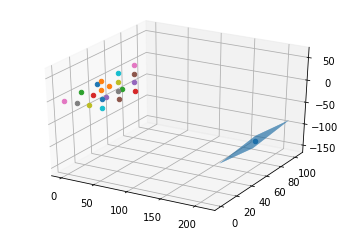

In [33]:
ax = plt.figure().gca(projection='3d')
ax.plot_surface(x,y,z)
ax.scatter3D(C[0], C[1], C[2])
for i in range(len(HomogeneousScaledWorldCoordinates)):
  x = HomogeneousScaledWorldCoordinates[i][0]
  y = HomogeneousScaledWorldCoordinates[i][1]
  z = HomogeneousScaledWorldCoordinates[i][2]
  ax.scatter3D(x, y, z)

## Part 4 (20 marks)
### Search for the sensor information of your camera on the web. From this information, compute the focal length in mm. The following link may be useful to look up sensor sizes in mm(since most smartphone sensor sizes will be quoted in inches):
https://www.digicamdb.com/sensor-sizes/
### now re-plot everything along with the principal point of camera

Computing the focal length in mm:

In [0]:
# The phone used to take the picture was huawei nova 3.
# The sensor size is 1/2.8 inches
SensorWidth = 5.145
SensorHeight = 3.86

In [35]:
# Finding dimensions of the image captured
dimension = Calibration_object.shape
dimension

(1071, 753, 3)

In [0]:
width = dimension[0]
height = dimension[1]

In [37]:
Mx = height/SensorHeight
Mx = round(Mx, 2)

My = width/SensorWidth
My = round(My, 2)

X = abs(K[0,0])
Y = abs(K[1,1])

Fx = X/Mx
Fy = Y/My

print(Fx, Fy)

8.505858753557808 7.819131841093261


Computing principal point of camera:

In [38]:
X = K[0,2]
Y = K[1,2]
Z = K[2,2]

PrincipalPointOfCamera = np.array(
    [
     [X, Y, Z]
    ]
)

PrincipalPointOfCamera = np.transpose(PrincipalPointOfCamera)
PrincipalPointOfCamera

array([[390.15248819],
       [517.28953647],
       [  1.        ]])

Re-plotting everything along with the principal point of camera.

In [39]:
orientation = P[2]
lastCol = orientation[-1]
UpdatedOrientation = orientation/lastCol
UpdatedOrientation

array([-3.09076347e-03, -7.70976487e-04,  2.96507481e-03,  1.00000000e+00])

In [0]:
a, b, c, d = UpdatedOrientation

In [0]:
Range = range(50)
x, y = np.meshgrid(Range, Range)

In [0]:
x = x + C[0] - 25
y = y + C[1] - 25

In [0]:
z = (-a*x-b*y-d)*1.0/c

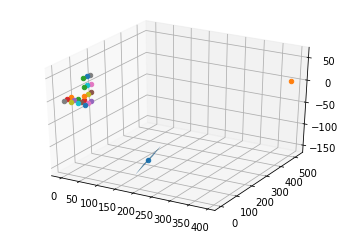

In [44]:
ax = plt.figure().gca(projection='3d')
ax.plot_surface(x,y,z)
ax.scatter3D(C[0], C[1], C[2])
ax.scatter3D(PrincipalPointOfCamera[0], PrincipalPointOfCamera[1], PrincipalPointOfCamera[2])

for i in range(len(HomogeneousScaledWorldCoordinates)):
  x = HomogeneousScaledWorldCoordinates[i][0]
  y = HomogeneousScaledWorldCoordinates[i][1]
  z = HomogeneousScaledWorldCoordinates[i][2]
  ax.scatter3D(x, y, z)

## Part 5 (10 marks)
### Suggest a few ways to minimize the error in this whole procedure. Since you are suggesting these, go back and try repeating/tweaking the whole algorithm and see if the things you suggest actually have an impact on the solution (it is perfectly fine if your propositions are not resulting in anything positive) (Suggest at least 2)

1. Make more precise measurements.
2. Take more images from various angles.
3. Take more image points.
 
I tried taking more image points but that didn't make much difference. In addition to this, I took more precise measurements (corner points of each small box) and that did reduce the error but only slightly. 

I tried taking more image points but that didn't make much difference.

## Part 6 (Grad Only, 20 marks for this part)(Upto 10 marks bonus for Undergrads)
### Look up the existing ways of camera calibration and draw a comparisons between the one you've implemented above. While comparing the two algorithms, you should be able the explain the computation/space complexity of the two algorithms, the assumptions that are kept in both algorithms and under what circumstances each would fail. You should also explain the equations involved in both algorithms.
### In case you have opted for not following the handout (i.e looking up and implementing your own algo) you can draw comparison between the algorithm that you've written and the one proposed in the handout (DLT)

In [0]:
# your answer goes here